## Project 3: Convolution of Two Signals

# Part 1: Manual Convolution Calculation

## Step 1: Understanding Convolution

### Definition of Convolution

Convolution is a fundamental mathematical operation in signal processing, characterized by its ability to express the relationship between the input and output of a Linear Time-Invariant (LTI) system. It is a technique for deriving a third signal that represents how the shape of one signal is altered by another. This operation is central to systems analysis, signal processing, and applied mathematics.

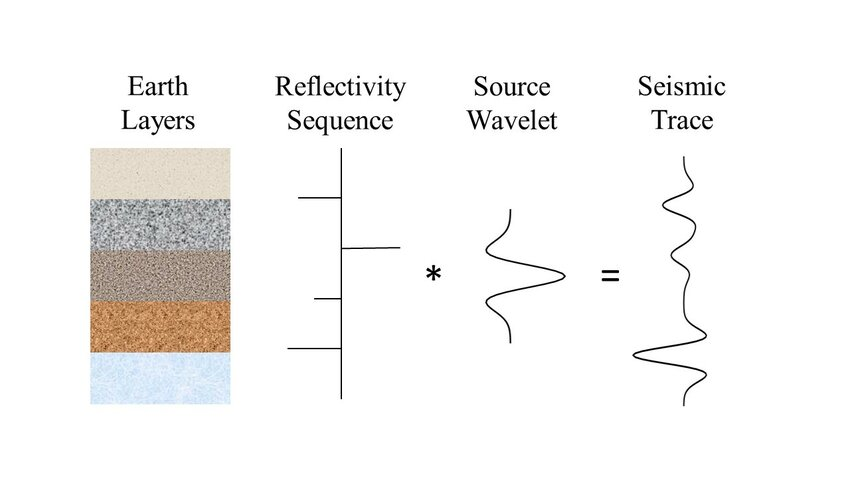

### How Convolution Works

In signal processing, convolution is used to determine the output signal (\( y(t) \)) of an LTI system when an input signal (\( x(t) \)) and the system's impulse response (\( h(t) \)) are known. The convolution of \( x(t) \) and \( h(t) \) is denoted as \( x(t) * h(t) \) and is defined by the integral:

$$
y(t) = (x * h)(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) \, d\tau
$$

For discrete systems, the convolution sum is:

$$
y[n] = (x * h)[n] = \sum_{m=-\infty}^{\infty} x[m] h[n - m]
$$

### Visual Interpretation

- **Graphical Interpretation**: Imagine sliding one signal across another, multiplying overlapping elements and summing the results to construct the new signal.
- **Physical Interpretation**: In physical systems, if \( h(t) \) represents the response of a system to an instantaneous unit input, then \( y(t) \) describes how the system reacts over time to the input signal \( x(t) \).

### Importance in Engineering

Understanding and implementing convolution is critical in fields such as electrical engineering, computer science, and physics. It aids in designing and analyzing systems that include filters, audio processors, or any system where signals interact dynamically.

## Next Steps

In the next step, we will manually compute the convolution of two discrete signals to see how the theoretical concepts apply in practice.


In [1]:
import numpy as np
import timeit

In [10]:
# Step 1: Function to manually calculate convolution
def manual_convolution(signal1, signal2):
    # Ensure the first signal is the longer one
    if len(signal1) < len(signal2):
        signal1, signal2 = signal2, signal1
    # Pad signal1 with zeros on both sides
    pad_signal1 = np.pad(signal1, (len(signal2)-1, len(signal2)-1),
                         mode='constant', constant_values=(0, 0))
    result = []
    # Perform the convolution
    for i in range(len(signal2) + len(signal1) - 1):
        result.append(np.dot(pad_signal1[i:i+len(signal2)], signal2[::-1]))
    return np.array(result)



In [11]:
signal1 = np.array([1, 2, 3])
signal2 = np.array([0, 1, 0.5])

# Step 2: Calculate convolution using NumPy

start_time_np = timeit.default_timer()
conv_np = np.convolve(signal1, signal2)
time_np = timeit.default_timer() - start_time_np

# Step 3: Calculate convolution using Our function (above)
start_time_manual = timeit.default_timer()
conv_manual = manual_convolution(signal1, signal2)
time_manual = timeit.default_timer() - start_time_manual

In [13]:
# Print results and compare speeds
print(f"Manual Convolution: {conv_manual} (Time: {time_manual:.5f} seconds)")
print(f"NumPy Convolution: {conv_np} (Time: {time_np:.5f} seconds)")
print(f"Manual/Numpy Time Ratio: {time_manual/time_np:.5f}")

Manual Convolution: [0.  1.  2.5 4.  1.5] (Time: 0.00556 seconds)
NumPy Convolution: [0.  1.  2.5 4.  1.5] (Time: 0.00013 seconds)
Manual/Numpy Time Ratio: 41.42730


In [14]:
# How np.pad works:
arr = np.array([1, 2, 3, 4, 5])
padded_arr = np.pad(arr, 2)

In [15]:
print(padded_arr)

[0 0 1 2 3 4 5 0 0]
